<a href="https://colab.research.google.com/github/Glenap/AI-Odyssey-Deep-Dive-Into-Transformers-and-its-Applications/blob/main/Assignment_1/231154_VikashYadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT 1: SUPERVISED AND UNSUPERVISED LEARNING
This assignment will cover the various models taught in class that are regularly used for supervised and unsupervised learning.

Recall that Supervised Learning is the paradigm of machine learning that makes use of data labels for training, along with the data features, while  unsupervised relies only on data features.


**BEFORE ANYTHING, IMPORT THE NECESSARY LIBRARIES**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## SUPERVISED LEARNING

As described in class, the datapoints used in supervised learning are associated with output labels which are used for training. The models trained are then used to predict on similar unseen data to produce similar labels.

Supervised learning is broadly divided into two parts:
- Regression: The output labels are continuous in nature.
- Classification: The output labels are discrete in nature.

We'll begin with classification. Recall some of the models taught for the same- **Logistic Regression, Support Vector Machine, KNN, Naive Bayes, Decision Trees and Random Forests**

### BINARY CLASSIFICATION

In [27]:
! gdown 1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP

Downloading...
From: https://drive.google.com/uc?id=1nkDc4tAv7yMASRSLkbRAttr8qSG5dmcP
To: /content/nba_logreg.csv
100% 129k/129k [00:00<00:00, 73.4MB/s]


**Import the csv file `NBA_logreg.csv` as a Pandas dataframe.**

In [28]:
# ENTER YOUR CODE HERE
df=pd.read_csv("nba_logreg.csv")

**Lets analyse the data a tiny bit!**

**What are the no. of rows and columns in the dataset?**

In [29]:
#ENTER YOUR CODE HERE
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1340 non-null   object 
 1   GP           1340 non-null   int64  
 2   MIN          1340 non-null   float64
 3   PTS          1340 non-null   float64
 4   FGM          1340 non-null   float64
 5   FGA          1340 non-null   float64
 6   FG%          1340 non-null   float64
 7   3P Made      1340 non-null   float64
 8   3PA          1340 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1340 non-null   float64
 11  FTA          1340 non-null   float64
 12  FT%          1340 non-null   float64
 13  OREB         1340 non-null   float64
 14  DREB         1340 non-null   float64
 15  REB          1340 non-null   float64
 16  AST          1340 non-null   float64
 17  STL          1340 non-null   float64
 18  BLK          1340 non-null   float64
 19  TOV   

**What are the columns?**

In [30]:
#ENTER YOUR CODE HERE
print(df.keys())

Index(['Name', 'GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'TARGET_5Yrs'],
      dtype='object')


**What does the beginning of the dataset look like?**

In [31]:
#ENTER YOUR CODE HERE
print(df.head())

              Name  GP   MIN  PTS  FGM  FGA   FG%  3P Made  3PA   3P%  ...  \
0   Brandon Ingram  36  27.4  7.4  2.6  7.6  34.7      0.5  2.1  25.0  ...   
1  Andrew Harrison  35  26.9  7.2  2.0  6.7  29.6      0.7  2.8  23.5  ...   
2   JaKarr Sampson  74  15.3  5.2  2.0  4.7  42.2      0.4  1.7  24.4  ...   
3      Malik Sealy  58  11.6  5.7  2.3  5.5  42.6      0.1  0.5  22.6  ...   
4      Matt Geiger  48  11.5  4.5  1.6  3.0  52.4      0.0  0.1   0.0  ...   

   FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV  TARGET_5Yrs  
0  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3          0.0  
1  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6          0.0  
2  1.3  67.0   0.5   1.7  2.2  1.0  0.5  0.3  1.0          0.0  
3  1.3  68.9   1.0   0.9  1.9  0.8  0.6  0.1  1.0          1.0  
4  1.9  67.4   1.0   1.5  2.5  0.3  0.3  0.4  0.8          1.0  

[5 rows x 21 columns]


Actually, the given dataset describes the player history of several NBA players. The column 'TARGET_5yrs' only contains the values 0 and 1, with 0 standing for players who played for less than 5 years, and 1 for players who played for more than or equal to 5 years. Thus, 0 and 1 stand for 2 classes- binary classification!

**Clean the dataset. Drop the NaN values!**



In [32]:
#ENTER YOUR CODE HERE
df.dropna(inplace=True)


**What is the shape of the dataframe now?**

In [33]:
#ENTER YOUR CODE HERE
print('Shape of the dataframe post dropping rows with NaN values is:',(df.shape))

Shape of the dataframe post dropping rows with NaN values is: (1329, 21)


**For training, first create a dataframe that stores the columns to be used for training, and another dataframe that stores the labels.**

In [34]:
#ENTER YOUR CODE HERE
df.drop('Name',axis=1,inplace=True)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=266, random_state=42)
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")

split_ratio = X_train.shape[0] / X_test.shape[0]
print(f"The train-to-test split ratio is: {split_ratio}")

The shape of training features dataframe is: (1063, 19)
The shape of testing features dataframe is: (266, 19)
The shape of training labels dataframe is: (1063,)
The shape of test labels dataframe is: (266,)
The train-to-test split ratio is: 3.9962406015037595


It is considered best practice to divide the dataset into two parts- test and train(Search the internet for the reason- we'll ask in class :)).

**Import the sklearn module that allows us to split the dataset into train and test.**

In [35]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split

**Now divide the features and label dataframes into train and test splits.**

In [36]:
#ENTER YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=266, random_state=42)

**Now load the sklearn module that allows the creation of a logistic regression model.**

In [37]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LogisticRegression

**Onto training! Train the a logistic regression model using the training features and labels dataframes.**

In [38]:
#ENTER YOUR CODE HERE
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Your model is trained! Time to check how good it is by using it on the testing dataframe.
Some metrics are used to check the reliability of a model.

**As an exercise, read about these and fill out the markdown below!**


- Accuracy:
- F1 score:
- Precision:
- Recall:

All of these can be calculated for our model using sklearn modules.

**Import them!**

In [39]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

**Now test on the testing dataframe and print all of these metrics.**

In [40]:
#ENTER YOUR CODE HERE
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Accuracy of the model is: {accuracy:}")
print(f"F1 score of the model is: {f1:.4f}")
print(f"Precision of the model is: {precision:}")
print(f"Recall of the model is: {recall:}")

Accuracy of the model is: 0.7518796992481203
F1 score of the model is: 0.8136
Precision of the model is: 0.8089887640449438
Recall of the model is: 0.8181818181818182


**Your Logistic Regression model is well trained!**

Support Vector Machine is another model that can be used both for regression and classification. We'll be training a classification model on our current dataset.

**Import the sklearn module that is used to implement a classification SVM**

In [41]:
#ENTER YOUR CODE HERE
from sklearn import svm

**Just as we had before, load and fit a model on our training dataset.**

In [42]:
#ENTER YOUR CODE HERE
clf = svm.SVC()
clf.fit(X_train, y_train)


SVC()

**Now test the model on the training dataset, and check the relevant metrics!**

In [43]:
#ENTER YOUR CODE HERE
y_pred = clf.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
print(f"Accuracy of the model is: {accuracy:}")
print(f"F1 score of the model is: {f1:}")
print(f"Precision of the model is: {precision:}")
print(f"Recall of the model is: {recall:}")

Accuracy of the model is: 0.6933207902163687
F1 score of the model is: 0.7704225352112676
Precision of the model is: 0.7103896103896103
Recall of the model is: 0.8415384615384616


### MULTICLASS CLASSIFICATION

In [44]:
! gdown 1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC

Downloading...
From: https://drive.google.com/uc?id=1bhWHfp1QS7ZHbNbxP_zFtEUAf76WfntC
To: /content/social_well_being.csv
100% 43.1k/43.1k [00:00<00:00, 71.6MB/s]


**Import the csv `social_well_being.csv` as a pandas dataframe.**

In [45]:
#ENTER YOUR CODE HERE
df=pd.read_csv("social_well_being.csv")

**Always analyse the data.**

In [46]:
#ENTER YOUR CODE HERE
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     924 non-null    int64 
 1   Age                         924 non-null    int64 
 2   Gender                      924 non-null    object
 3   Platform                    924 non-null    object
 4   Daily_Usage_Time (minutes)  924 non-null    int64 
 5   Posts_Per_Day               924 non-null    int64 
 6   Likes_Received_Per_Day      924 non-null    int64 
 7   Comments_Received_Per_Day   924 non-null    int64 
 8   Messages_Sent_Per_Day       924 non-null    int64 
 9   Dominant_Emotion            924 non-null    object
dtypes: int64(7), object(3)
memory usage: 72.3+ KB
None


In [47]:
print(df.keys())

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')


In [48]:
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120,3,45,10,12,Happiness
1,2,30,Male,Twitter,90,5,20,25,30,Anger
2,3,22,Non-binary,Facebook,60,2,15,5,20,Neutral
3,4,28,Female,Instagram,200,8,100,30,50,Anxiety
4,5,33,Male,LinkedIn,45,1,5,2,10,Boredom


Since its multiclass-classification, the classes column 'Dominant_Emotion' has more than two classes.

**Can you find out what these classes are?**

In [49]:
#ENTER YOUR CODE HERE
print("The classes are:",df.Dominant_Emotion.unique())

The classes are: ['Happiness' 'Anger' 'Neutral' 'Anxiety' 'Boredom' 'Sadness']


Actually this isn't the only categorical column in the dataset. There are other too.

**Print their values as well!**

In [50]:
#ENTER YOUR CODE HERE
print("The genders are:" ,df.Gender.unique())
print("The platforms used are:",df.Platform.unique())

The genders are: ['Female' 'Male' 'Non-binary']
The platforms used are: ['Instagram' 'Twitter' 'Facebook' 'LinkedIn' 'Whatsapp' 'Telegram'
 'Snapchat']


Many models, including KNN, will only work with numerical data. Hence the textual categories need to go. We will use something called "one-hot encoding" for transforming our features and "labelling" for our categories.

**Import the pandas module used for one-hot encoding**

In [51]:
#ENTER YOUR CODE HERE
import pandas as pd


**First One-Hot Encode the 'Gender' column and replace the 'Gender' column with this.**

In [52]:
#ENTER YOUR CODE HERE
gender_one_hot = pd.get_dummies(df["Gender"])
df=pd.concat([df,gender_one_hot], axis=1)

df.drop("Gender",axis=1,inplace=True)
df = df.replace({True: 1, False: 0})
print(df)

     User_ID  Age   Platform  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25  Instagram                         120              3   
1          2   30    Twitter                          90              5   
2          3   22   Facebook                          60              2   
3          4   28  Instagram                         200              8   
4          5   33   LinkedIn                          45              1   
..       ...  ...        ...                         ...            ...   
919      996   33    Twitter                          85              4   
920      997   22   Facebook                          70              1   
921      998   35   Whatsapp                         110              3   
922      999   28   Telegram                          60              2   
923     1000   27   Snapchat                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                 

**Repeat the drill for the column 'Platform'.**

In [53]:
#ENTER YOUR CODE HERE
platform_one_hot = pd.get_dummies(df["Platform"])
df=pd.concat([df,platform_one_hot], axis=1)

df.drop("Platform",axis=1,inplace=True)
df = df.replace({True: 1, False: 0})
print(df)

     User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25               

Last categorical feature is our label column.

**Import the module used for label encoding.**

In [54]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import LabelEncoder

**Now label encode the column 'Dominant_Emotion'**

In [55]:
#ENTER YOUR CODE HERE
label_encoder=LabelEncoder()
df['Dominant_Emotion_Encoded']=label_encoder.fit_transform(df['Dominant_Emotion'])
df.drop(['Dominant_Emotion'],axis=1,inplace=True)
print(df)

     User_ID  Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
0          1   25                         120              3   
1          2   30                          90              5   
2          3   22                          60              2   
3          4   28                         200              8   
4          5   33                          45              1   
..       ...  ...                         ...            ...   
919      996   33                          85              4   
920      997   22                          70              1   
921      998   35                         110              3   
922      999   28                          60              2   
923     1000   27                         120              4   

     Likes_Received_Per_Day  Comments_Received_Per_Day  Messages_Sent_Per_Day  \
0                        45                         10                     12   
1                        20                         25               

Now we have only numerical data, phew! Lets start training!


**Create the freatures dataframe and the labels dataframe as we had done before, and split them into train and test parts. Do you need to import the libraries again?**

In [56]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=185, random_state=42)
print(f"The shape of training features dataframe is: {X_train.shape}")
print(f"The shape of testing features dataframe is: {X_test.shape}")
print(f"The shape of training labels dataframe is: {y_train.shape}")
print(f"The shape of test labels dataframe is: {y_test.shape}")

split_ratio = X_train.shape[0] / X_test.shape[0]
print(f"The train-to-test split ratio is: {split_ratio}")

The shape of training features dataframe is: (739, 17)
The shape of testing features dataframe is: (185, 17)
The shape of training labels dataframe is: (739,)
The shape of test labels dataframe is: (185,)
The train-to-test split ratio is: 3.9945945945945946


**Import the module used for training a KNN model.**

In [57]:
#ENTER YOUR CODE HERE
from sklearn.neighbors import KNeighborsClassifier

**Train your model.**

In [58]:
#ENTER YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

**Create and print the Prediction Dataframe.**

In [59]:
#ENTER YOUR CODE HERE

y_pred = knn.predict(X_test_scaled)

predictions_df = pd.DataFrame(y_pred, columns=['Dominant_Emotion_Encoded_Predicted'])

print(predictions_df)

     Dominant_Emotion_Encoded_Predicted
0                                     0
1                                     0
2                                     2
3                                     3
4                                     4
..                                  ...
180                                   2
181                                   1
182                                   0
183                                   2
184                                   3

[185 rows x 1 columns]


I'm guessing you notice the issue. These are not our original labels!

**Tranform these labels using the encoder you had created while encoding 'Dominant_Emotion'.**

In [60]:
#ENTER YOUR CODE HERE
decoded_predictions = label_encoder.inverse_transform(y_pred)
print(decoded_predictions)

['Anger' 'Anger' 'Boredom' 'Happiness' 'Neutral' 'Neutral' 'Neutral'
 'Anxiety' 'Neutral' 'Boredom' 'Anger' 'Neutral' 'Boredom' 'Happiness'
 'Anger' 'Anxiety' 'Anxiety' 'Boredom' 'Happiness' 'Happiness' 'Anger'
 'Boredom' 'Anxiety' 'Happiness' 'Boredom' 'Neutral' 'Anger' 'Anxiety'
 'Anger' 'Neutral' 'Anxiety' 'Sadness' 'Anger' 'Happiness' 'Anger'
 'Neutral' 'Anger' 'Happiness' 'Sadness' 'Anxiety' 'Anger' 'Anger'
 'Sadness' 'Neutral' 'Happiness' 'Neutral' 'Neutral' 'Anger' 'Happiness'
 'Boredom' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Happiness' 'Anger'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Anxiety' 'Happiness' 'Sadness'
 'Anxiety' 'Happiness' 'Happiness' 'Happiness' 'Anxiety' 'Neutral'
 'Happiness' 'Neutral' 'Boredom' 'Boredom' 'Anxiety' 'Neutral' 'Happiness'
 'Neutral' 'Happiness' 'Anger' 'Sadness' 'Sadness' 'Neutral' 'Sadness'
 'Anger' 'Happiness' 'Happiness' 'Anger' 'Anger' 'Boredom' 'Happiness'
 'Anxiety' 'Neutral' 'Anger' 'Sadness' 'Neutral' 'Happiness' 'Happiness'
 'Sadnes

**Now print the relevant metrics! Don't forget to get original y_test first!**

In [61]:
#ENTER YOUR CODE HERE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
decoded_y_test = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(decoded_y_test, decoded_predictions)
print(f'Accuracy of the model is: {accuracy}')

Accuracy of the model is: 0.8972972972972973


**That's a good model!**

Since it's multi-class classification, traditional metrics like precision and recall won't work. We'll judge our model using a confusion matrix and classification report!

**Import the module for confusion matrix and classification report, and print them.**

In [62]:
#ENTER YOUR CODE HERE
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[27  1  0  0  0  1]
 [ 2 24  5  0  3  1]
 [ 0  0 17  0  1  0]
 [ 0  1  0 42  0  0]
 [ 1  1  0  0 33  0]
 [ 0  0  2  0  0 23]]

Classification Report:
              precision    recall  f1-score   support

       Anger       0.90      0.93      0.92        29
     Anxiety       0.89      0.69      0.77        35
     Boredom       0.71      0.94      0.81        18
   Happiness       1.00      0.98      0.99        43
     Neutral       0.89      0.94      0.92        35
     Sadness       0.92      0.92      0.92        25

    accuracy                           0.90       185
   macro avg       0.88      0.90      0.89       185
weighted avg       0.90      0.90      0.90       185



We already have our training and test datasets ready, lets train some other models.

**Import Naive Bayes**

In [63]:
#ENTER YOUR CODE HERE
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

**Now instantiate and fit a model.**

In [64]:
#ENTER YOUR CODE HERE
gnb = GaussianNB()

gnb.fit(X_test_scaled, y_test)

GaussianNB()

**Predict on the test features, and dont forget to inverse transform!**

In [65]:
#ENTER YOUR CODE HERE
y_pred = gnb.predict(X_test_scaled)
decoded_predictions = label_encoder.inverse_transform(y_pred)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
decoded_y_test = label_encoder.inverse_transform(y_test)
accuracy = accuracy_score(decoded_y_test, decoded_predictions)


**Finally, print the accuracy, confusion matrix and classification report.**

In [66]:
#ENTER YOUR CODE HERE
print(f'Accuracy of the model is: {accuracy}')
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)

Accuracy of the model is: 0.42162162162162165

Confusion Matrix:
[[23  0  2  4  0  0]
 [ 8  0 14 12  0  1]
 [ 4  0 14  0  0  0]
 [ 5  0  0 37  0  1]
 [ 9  0 20  4  0  2]
 [11  0  9  1  0  4]]

Classification Report:
              precision    recall  f1-score   support

       Anger       0.38      0.79      0.52        29
     Anxiety       0.00      0.00      0.00        35
     Boredom       0.24      0.78      0.36        18
   Happiness       0.64      0.86      0.73        43
     Neutral       0.00      0.00      0.00        35
     Sadness       0.50      0.16      0.24        25

    accuracy                           0.42       185
   macro avg       0.29      0.43      0.31       185
weighted avg       0.30      0.42      0.32       185



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Now train a 'Decision Tree' and a 'Random Forest Generator' for the same classification problem.Feel free to play with the hyperparameters!

### Report the accuracy score for each!

### REGRESSION


In [67]:
! gdown 1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX

Downloading...
From: https://drive.google.com/uc?id=1lSdE2FDZbZ-w0JZ9fJBqC3l9EQwO9YLX
To: /content/IPL 2022 Batters.csv
100% 7.91k/7.91k [00:00<00:00, 21.4MB/s]


**Import the csv `IPL 2022 Batters.csv` as a pandas dataframe.**

In [68]:
#ENTER YOUR CODE HERE
df=pd.read_csv("IPL 2022 Batters.csv")

**First things first, analyze the data**

In [69]:
#ENTER YOUR CODE HERE
print(df.keys())

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s'],
      dtype='object')


**Use a function to find out about the datatypes of the features**

In [70]:
#ENTER YOUR CODE HERE
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  162 non-null    object 
 1   Mat     162 non-null    int64  
 2   Inns    162 non-null    int64  
 3   NO      162 non-null    int64  
 4   Runs    162 non-null    int64  
 5   HS      162 non-null    object 
 6   Avg     162 non-null    object 
 7   BF      162 non-null    int64  
 8   SR      162 non-null    float64
 9   100     162 non-null    int64  
 10  50      162 non-null    int64  
 11  4s      162 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 15.3+ KB
None


In [71]:
print(df)

                  Player  Mat  Inns  NO  Runs    HS    Avg   BF      SR  100  \
0            Jos Buttler   17    17   2   863   116  57.53  579  149.05    4   
1              K L Rahul   15    15   3   616  103*  51.33  455  135.38    2   
2        Quinton De Kock   15    15   1   508  140*  36.29  341  148.97    1   
3          Hardik Pandya   15    15   4   487   87*  44.27  371  131.26    0   
4           Shubman Gill   16    16   2   483    96   34.5  365  132.32    0   
..                   ...  ...   ...  ..   ...   ...    ...  ...     ...  ...   
157     Fazalhaq Farooqi    3     1   1     2    2*      -    8   25.00    0   
158   Jagadeesha Suchith    5     2   0     2     2      1    8   25.00    0   
159          Tim Southee    9     5   1     2    1*    0.5   12   16.66    0   
160  Nathan Coulter-Nile    1     1   1     1    1*      -    2   50.00    0   
161        Anrich Nortje    6     1   1     1    1*      -    6   16.66    0   

     50  4s  
0     4  83  
1     4  45

**Interestingly, not all features are numerical !**

Drop the irrelevant features and convert the non numerical features in to numerical ones by some procedure

In [72]:
values = []
for i,val in enumerate(df['Avg'].values) :
  if val == '-' :
    values.append(0)
  else :
    values.append(float(val))

df['Avg'] = values

In [73]:
values = []
for value in df['HS'].values :
  if value[-1] == '*' :
    value = value[:-1]
  values.append(int(value))

df['HS'] = values

In [74]:
df = df.drop(["Player"], axis = 1)

**Print the head to get a look at the data again**

In [75]:
#ENTER YOUR CODE HERE
print(df.head(25))

    Mat  Inns  NO  Runs   HS    Avg   BF      SR  100  50  4s
0    17    17   2   863  116  57.53  579  149.05    4   4  83
1    15    15   3   616  103  51.33  455  135.38    2   4  45
2    15    15   1   508  140  36.29  341  148.97    1   3  47
3    15    15   4   487   87  44.27  371  131.26    0   4  49
4    16    16   2   483   96  34.50  365  132.32    0   4  51
5    16    16   9   481   94  68.71  337  142.72    0   2  32
6    16    16   1   468   96  31.20  367  127.52    0   3  49
7    14    14   2   460   88  38.33  375  122.66    0   3  47
8    17    17   1   458   55  28.63  312  146.79    0   2  43
9    15    14   0   451   59  32.21  330  136.66    0   4  36
10   14    14   2   437   70  36.42  240  182.08    0   4  29
11   12    12   3   432   92  48.00  287  150.52    0   5  52
12   14    14   0   426   75  30.43  320  133.12    0   2  47
13   14    14   1   418   81  32.15  348  120.11    0   3  45
14   14    14   3   413   76  37.55  261  158.23    0   3  40
15   14 

**Check for null values and drop them if found**

In [76]:
#ENTER YOUR CODE HERE
df.dropna(inplace=True)

**Examine the shape of the dataset**

In [77]:
#ENTER YOUR CODE HERE
print(df.shape)

(162, 11)


**Separate the features and the target label**

What type of target features are associated with a Regression task ?

Continuous ones, yes. In this dataset, all the features are continuous ones. Let's pick the number of 4s as the prediction target for now.

In [78]:
#ENTER YOUR CODE HERE
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

**Split the dataset into training set and testing set**

Pick a suitable test size

In [79]:
#ENTER YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=32, random_state=42)

**Import Linear Regression from sklearn**

In [80]:
#ENTER YOUR CODE HERE
from sklearn.linear_model import LinearRegression

**Create a model**

In [81]:
#ENTER YOUR CODE HERE
linreg = LinearRegression()





**Use this model to fit on training data**

In [82]:
#ENTER YOUR CODE HERE
linreg.fit(X_train, y_train)

LinearRegression()

**Time to get some predictions**

In [83]:
#ENTER YOUR CODE HERE
y_pred = linreg.predict(X_test)
print(y_pred)


[ 1.11061399  0.81757233  1.01718526 13.12570452  3.55615083 29.4171439
  3.53447002 15.56716776  3.54398469 -0.2120158  37.0429851   4.61927349
 38.99781487  9.83424338 28.36936013 25.1562588   1.91044359  2.11857387
  5.31346036 36.42132852  8.21740817 36.52589852 40.94185132 46.64159418
 25.65814833 -0.06188903  2.00927672 14.70717432  1.08791565  1.52619706
  1.54135918  5.35007658]


**Find the MSE,MAE and RMSE for the model**

As an exercise, briefly write about these metrics below

MSE : It is used to test the accuracy of regression model . It calculate the error of mean of squares of difference between actual and predicted value.

RMSE : It is basically root over mean squared error.

MAE :is another common metric for evaluating regression models. It measures the average absolute differences between the actual and predicted values.


In [84]:
#ENTER YOUR CODE HERE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 13.884463376664888
Mean Absolute Error (MAE): 2.810083475032122
Root Mean Squared Error (RMSE): 3.72618617042478


**There you have it, your first regression model is ready!**

## UNSUPERVISED LEARNING

In [85]:
! gdown 1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw

Downloading...
From: https://drive.google.com/uc?id=1KpPxlEvltC7qn7AJk8wqO3-_7jzsy8yw
To: /content/iris.csv
100% 2.47k/2.47k [00:00<00:00, 9.91MB/s]


**Load the iris dataset**

In [86]:
#ENTER YOUR CODE HERE
df=pd.read_csv("iris.csv")

**No need to mention what to do next :)**

In [87]:
#ENTER YOUR CODE HERE
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


**Plot pairwise plot to see relations between the features**

Hint : Use the seaborn library for pairplots

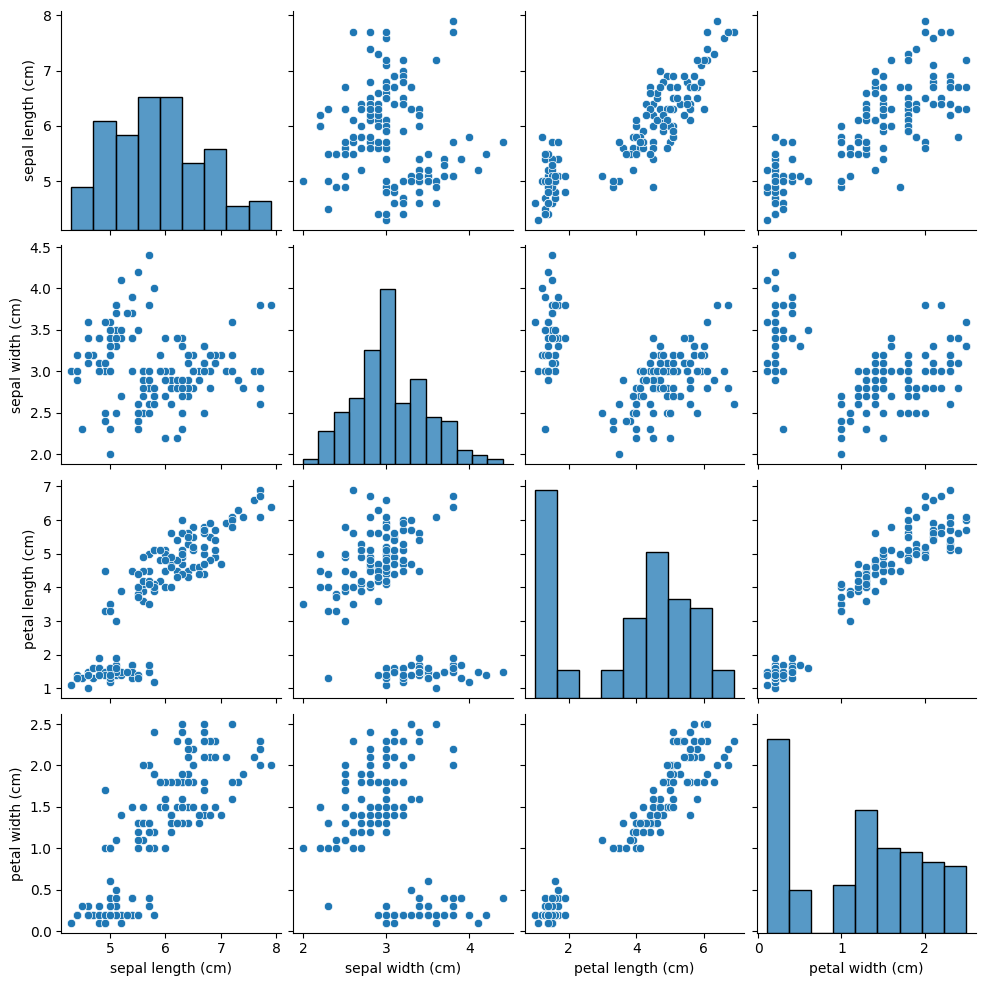

In [89]:
#ENTER YOUR CODE HERE
import seaborn as sns
sns.pairplot(df)
plt.show()


As apparent, there is no label assigned to these entries

**Therefore let us try to Cluster the data to see any similarities**

**Import KMeans from sklearn**

In [90]:
#ENTER YOUR CODE HERE
from sklearn.cluster import KMeans


**Perform K Means Clustering**

In [91]:
#ENTER YOUR CODE HERE
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

**Add cluster labels to the DataFrame**

In [92]:
#ENTER YOUR CODE HERE
df['Cluster_Labels'] = kmeans.labels_

**Analyse the clusters, find the centers and the number of observations in each cluster**

In [93]:
#ENTER YOUR CODE HERE
centroids = kmeans.cluster_centers_


cluster_counts = df['Cluster_Labels'].value_counts().sort_index()

for cluster_label in range(len(centroids)):
    print(f"Cluster {cluster_label}:")
    print(f"  Center: {centroids[cluster_label]}")
    print(f"  Number of Observations: {cluster_counts[cluster_label]}")
    print()

Cluster 0:
  Center: [5.9016129  2.7483871  4.39354839 1.43387097]
  Number of Observations: 62

Cluster 1:
  Center: [5.006 3.428 1.462 0.246]
  Number of Observations: 50

Cluster 2:
  Center: [6.85       3.07368421 5.74210526 2.07105263]
  Number of Observations: 38



**Visualise the cluster, make the plot again but this time with labels**

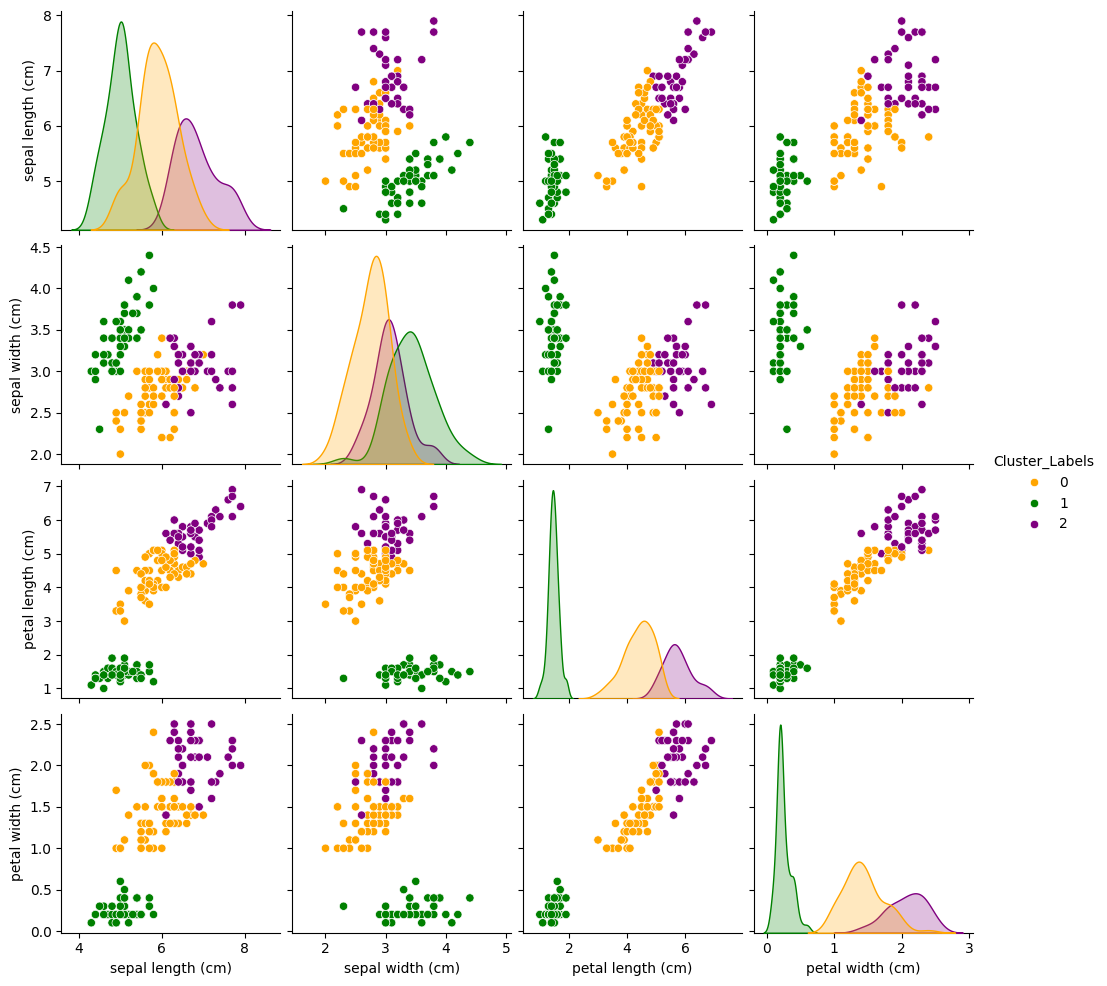

In [94]:
#ENTER YOUR CODE HERE
rgb_palette = {0: 'orange', 1: 'green', 2: 'purple'}

sns.pairplot(df, hue='Cluster_Labels', palette=rgb_palette, diag_kind='kde', markers=['o', 'o', 'o'])

plt.show()

# GOOD JOB!